## 1 - Basic Plots

Data: https://www.kaggle.com/ronitf/heart-disease-uci

In [1]:
# Importing the Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("heart.csv")

In [2]:
# Check for Plots using Different Functions

# Get Median of Chest Pain in Data

chest_pain = df.groupby(by="cp").median().reset_index()
chest_pain.head()

,cp,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,57.0,1.0,130.0,248.0,0.0,0.0,143.0,1.0,1.2,1.0,1.0,3.0,0.0
1,1,52.0,1.0,128.0,238.0,0.0,1.0,163.5,0.0,0.0,2.0,0.0,2.0,1.0
2,2,53.0,1.0,130.0,233.0,0.0,1.0,158.0,0.0,0.5,2.0,0.0,2.0,1.0
3,3,59.0,1.0,140.0,234.0,0.0,0.0,159.0,0.0,1.2,1.0,0.0,2.0,1.0


### Bar Plot

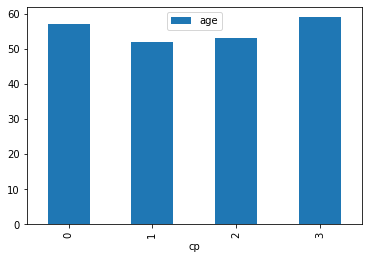

In [9]:
# Python Pandas Plot

chest_pain.plot.bar(x="cp", y="age");

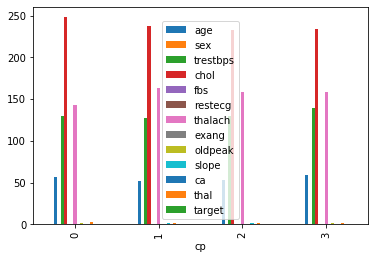

In [10]:
# To Print all columns associated in the Data
chest_pain.plot.bar(x="cp");

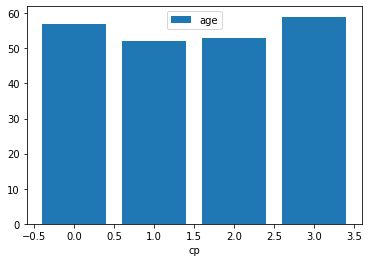

In [11]:
# Plot using Matplotlib

fig, ax = plt.subplots()
ax.bar(chest_pain["cp"], chest_pain["age"], label="age")
ax.set_xlabel("cp")
ax.legend();

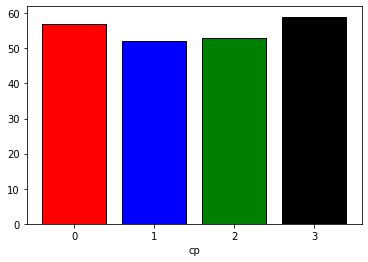

In [12]:
# Plot Data in Different Colors using Matplotlib

fig, ax = plt.subplots()
ax.bar(chest_pain["cp"], chest_pain["age"], label="age", 
       edgecolor="k", color=["red", "blue", "green", "black"])
ax.set_xlabel("cp")
ax.set_xticks(chest_pain["cp"]);

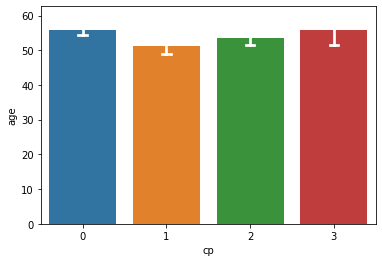

In [13]:
# Plot the same using Seaborn

ax = sns.barplot("cp", "age", errcolor="w", capsize=0.1, data=df)

### Scatter Plots

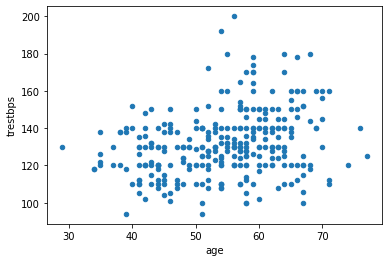

In [8]:
# Plot Scatterplot using Pandas

df.plot.scatter("age", "trestbps");

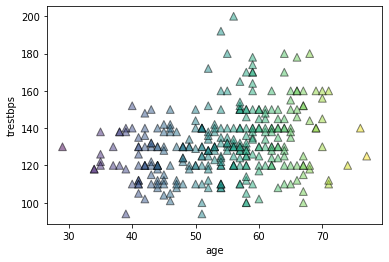

In [14]:
# Plot Scatter by Matplotlib

fig, ax = plt.subplots()
ax.scatter(df["age"], df["trestbps"], marker="^", 
           s=60, c=df["age"], edgecolors="k", alpha=0.5)
ax.set_xlabel("age")
ax.set_ylabel("trestbps");

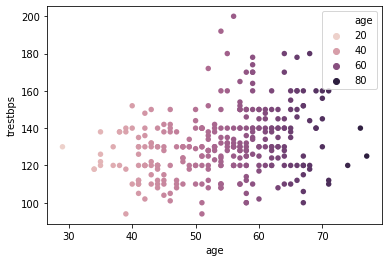

In [15]:
# Plot Scatterplots by Seaborn

sns.scatterplot("age", "trestbps", hue="age", s=30, edgecolor="none", data=df);

In [16]:
# Group Data by age and Plot Linechart

ages = df.groupby("age").median().reset_index()
ages.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1.0,1.0,130.0,204.0,0.0,0.0,202.0,0.0,0.00,2.0,0.0,2.0,1.0
1,34,0.5,2.0,118.0,196.0,0.0,0.5,183.0,0.0,0.35,2.0,0.0,2.0,1.0
2,35,1.0,0.0,124.0,195.0,0.0,1.0,165.0,0.5,0.70,2.0,0.0,2.5,0.5
3,37,0.5,2.0,125.0,232.5,0.0,1.0,178.5,0.0,1.75,1.0,0.0,2.0,1.0
4,38,1.0,2.0,138.0,175.0,0.0,1.0,173.0,0.0,0.00,2.0,4.0,2.0,1.0


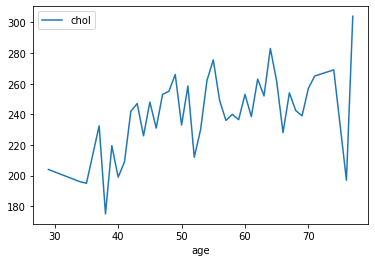

In [17]:
# Plotting the Linechart with Pandas for Cholestrol
ages.plot.line("age", "chol");

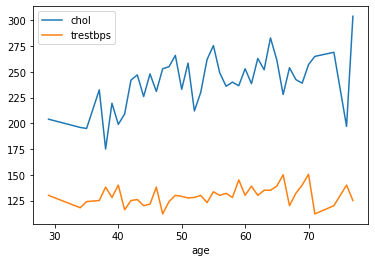

In [18]:
# Plot Chol and trestbps

ages.plot.line("age", ["chol", "trestbps"]);

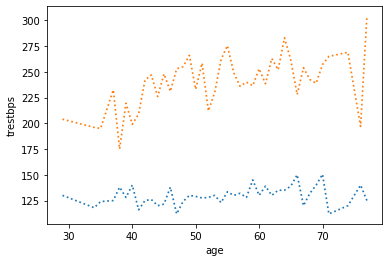

In [20]:
# Plot with dotten line as line using Matplotlib

fig, ax = plt.subplots()
ax.plot(ages["age"], ages[["trestbps", "chol"]], ls=":", lw=1.7)
ax.set_xlabel("age")
ax.set_ylabel("trestbps");

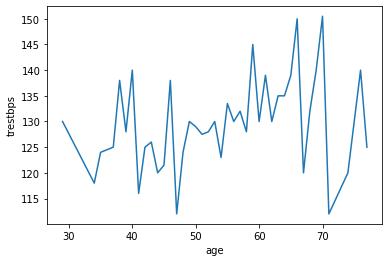

In [21]:
# Plot Linegraph using Seaborn

sns.lineplot("age", "trestbps", data=ages);

### Matplotlib is Much More Flexible than Pandas

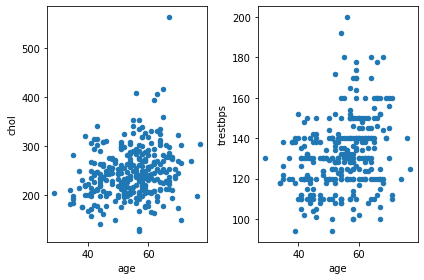

In [24]:
# Can pass axes to pandas for more flexibility
fig, axes = plt.subplots(ncols=2)
df.plot.scatter(x="age", y="chol", ax=axes[0])
df.plot.scatter(x="age", y="trestbps", ax=axes[1])
fig.tight_layout(); # Aligns the layouts Correctly

In [29]:
# Extract Figure og trestbps and age
fig2 = axes[0].get_figure()

In [30]:
fig2.savefig("plots.png", bbox_inches="tight", transparent=True)

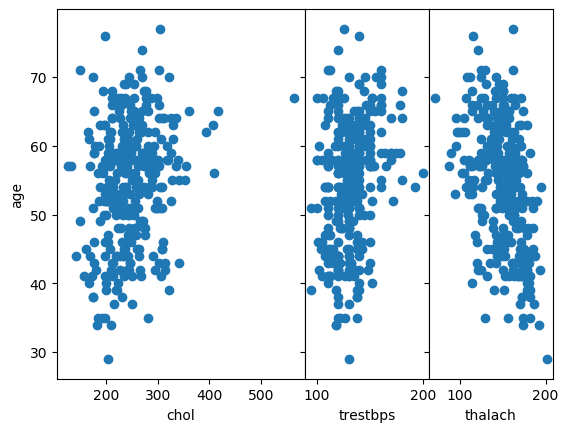

In [31]:
# Align Sizes for the Data

# You can easily change your style, recommended via a context manager (ie the with statement)
with plt.style.context("default"):
    fig, axes = plt.subplots(ncols=3, sharey=True, 
                             gridspec_kw={"width_ratios": [2, 1, 1], "wspace": 0})
    y = "age"
    xs = ["chol", "trestbps", "thalach"]
    for x, ax in zip(xs, axes):
        ax.scatter(df[x], df[y])
        ax.set_xlabel(x)
    axes[0].set_ylabel(y)
    fig.savefig("output.png", dpi=100, bbox_inches="tight")
    fig.savefig("output.pdf", dpi=100, bbox_inches="tight")

PDF's images are Far more Crisper than PNG, but difficult to embed, whereas PNG may pixelate while Zooming, but are easy to Embed on to Web pages/Applications

## 2 - 1 Dimensional Data Visualisation

### Histogram

Common way to Show a Distribution

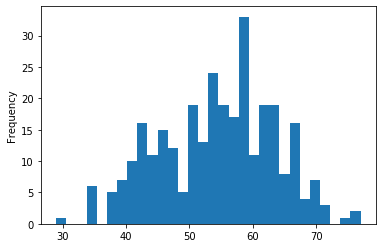

In [32]:
# Plot the Age Histogram with Pandas

df.age.plot.hist(bins=30);

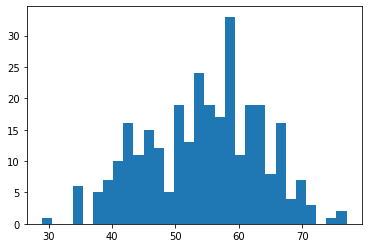

In [33]:
# Plot the Histogram using Matplotlib

plt.hist(df.age, bins=30);

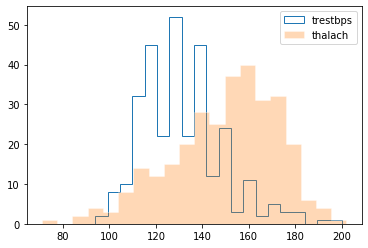

In [34]:
# Plot Stacked Histogram using Matplotlib

fig, ax = plt.subplots()
ax.hist(df.trestbps, bins=20, histtype="step", label="trestbps")
ax.hist(df.thalach, bins=20, histtype="stepfilled", label="thalach", alpha=0.3, edgecolor="w")
ax.legend();

### Box Plots

Shows mean, quartiles, IQR and outliers. IQR is inter-quartile range = (75% - 25%). Outliers are points more than 1.5 * IQR away.

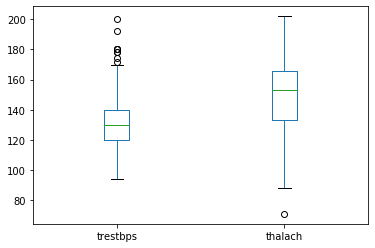

In [35]:
# Plot Boxplot using Pandas

df[["trestbps", "thalach"]].plot.box();

In [36]:
# Confirm the above with Descriptive Statistics

df[["trestbps", "thalach"]].describe()

,trestbps,thalach
count,303.000000,303.000000
mean,131.623762,149.646865
std,17.538143,22.905161
min,94.000000,71.000000
25%,120.000000,133.500000
50%,130.000000,153.000000
75%,140.000000,166.000000
max,200.000000,202.000000


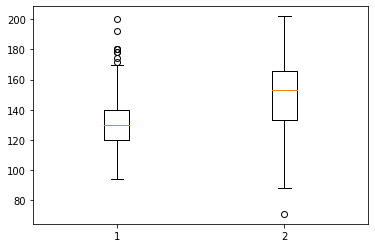

In [37]:
# Plot Boxplot by Matplotlib
 
plt.boxplot(df[["trestbps", "thalach"]].to_numpy()); # It assigns the Column as 1, 2 instead of Column Names

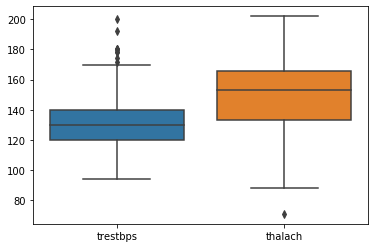

In [39]:
# Plot Boxplot with Seaborn

sns.boxplot(data=df[["trestbps", "thalach"]]);

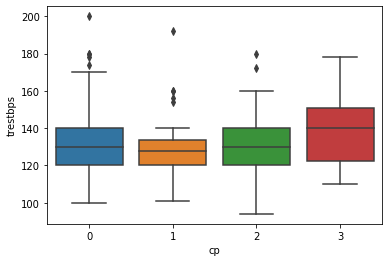

In [40]:
# Plot Boxplot for Different Chestpain rate via Seaborn

sns.boxplot(x="cp", y="trestbps", data=df);

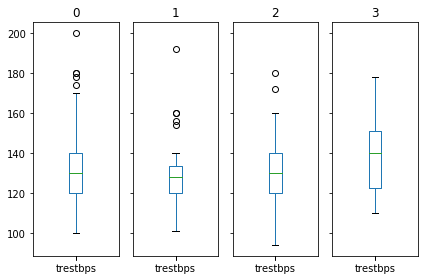

In [42]:
# Plot CP by grouping pandas

df.groupby("cp").boxplot(column="trestbps", sharex=True, layout=(1, 4), grid=False)
# If Layout is not Specified it would be a Mess
plt.tight_layout();

### Violin Plots
Like box plots... but better. Not a staple of pandas at the moment (though it has been requested)

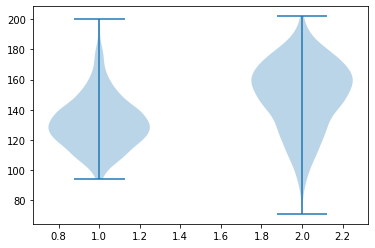

In [44]:
# Plot Violinplot by Matplotlib - It Shows the Distribution

fig, ax = plt.subplots()
ax.violinplot(df[["trestbps", "thalach"]].to_numpy());

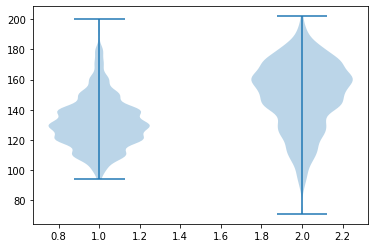

In [45]:
# Control the bandwidth to control the smoothing. - Lower is Realdata - bw_method
fig, ax = plt.subplots()
ax.violinplot(df[["trestbps", "thalach"]].to_numpy(), bw_method=0.2);

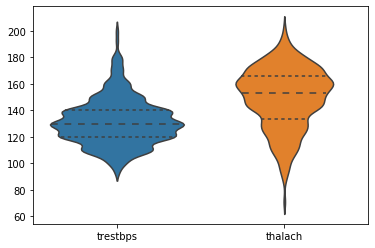

In [50]:
# Add Quartiles to the ViolinPlot via Seaborn

sns.violinplot(data=df[["trestbps", "thalach"]], inner="quartile", bw=0.2);

### Bee swarm plots

If you want to go fancy, these can be fun for presentations, but less concise than other plots.

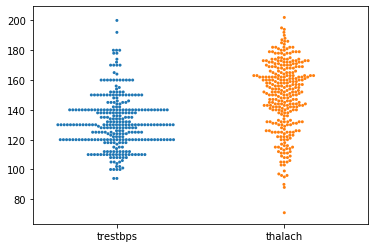

In [51]:
# Plot SwarmPlot using Seaborn

sns.swarmplot(data=df[["trestbps", "thalach"]], size=3);
# Swam Plot is best used, when combined with ViolinPlot

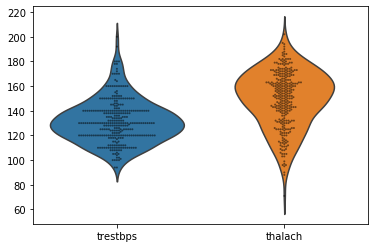

In [53]:
# Combine SwarmPlot and Violinplot using Seaborn

sns.violinplot(data=df[["trestbps", "thalach"]], inner=None);
sns.swarmplot(data=df[["trestbps", "thalach"]], size=2, color="k", alpha=0.5);
# Often combining this plot is right. You can see here it reveals structure in the violin plot for trestbps that the KDE is smoothing over.

## 3 - 2 Dimensional Histogram

Dataset:
For this example, we'll use the Meteor Impact data from NASA, available here: https://www.kaggle.com/nasa/meteorite-landings

In [3]:
# Importing the Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

# Loading the Data
df = pd.read_csv("meteorite-landings.csv")
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [4]:
# Check for Missing Values

df.isna().sum()

name              0
id                0
nametype          0
recclass          0
mass            131
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [5]:
# Drop the Missing Values of Reclong and Reclat

df = df.dropna(subset=["reclong", "reclat"])
df = df[df.reclong < 300]

### 2-D Histogram

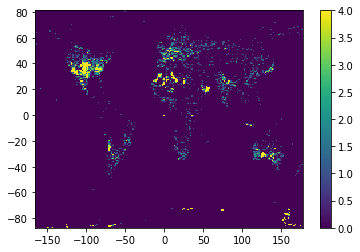

In [8]:
# Plot 2D Histogram with matplotlib

plt.hist2d(df.reclong, df.reclat, bins=200, vmax=4) # Vmax is used to Identify the Less Reactive Points
# VMax kind of standardises the data between 0 - n, as shown in Vertical bar below
plt.colorbar();

### 2-D HexBin

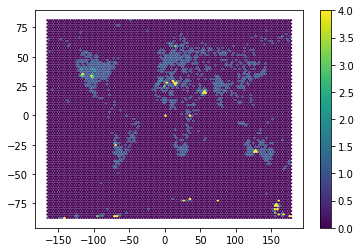

In [9]:
# 2D Hex Plots with matplotlib

plt.hexbin(df.reclong, df.reclat, bins=200, vmax=4, lw=0.0)
plt.colorbar();

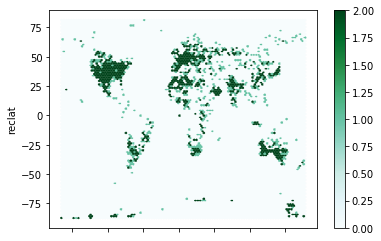

In [10]:
# Plot Hexbin plot using Pandas

df.plot.hexbin(x="reclong", y="reclat", vmax=2, gridsize=100, linewidth=0.25);

### Contour Plot

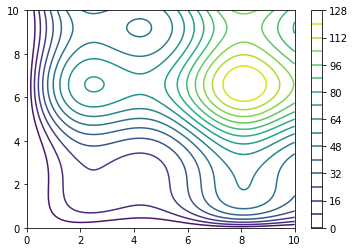

In [15]:
# Create your own Database

# Create 200 Points ranging from 0 - 10
spacing = np.linspace(0, 10, 200)
# MeshGrid returns 2-D grid coordinates based on the coordinates contained in vectors x and y
X, Y = np.meshgrid(spacing, spacing)

# Create Z with X and Y
Z = (np.sin(X) + np.cos(Y) + 2 * np.arcsinh(X * Y))**2

plt.contour(X, Y, Z, levels=20)
plt.colorbar();

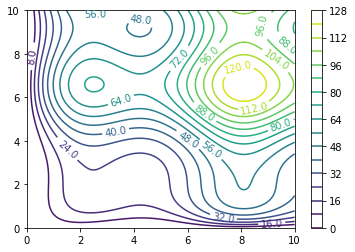

In [16]:
# Get the Inline Text of Contour

c = plt.contour(X, Y, Z, levels=20)
plt.clabel(c, inline=True, fmt="%0.1f")
plt.colorbar();

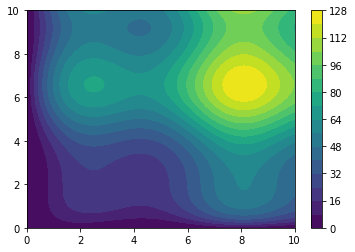

In [17]:
# Plot a Filled COntour

c = plt.contourf(X, Y, Z, levels=20)
plt.colorbar();

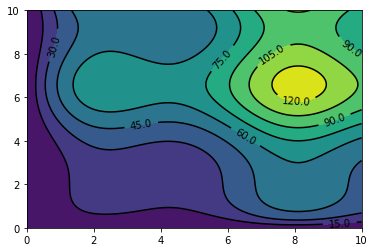

In [18]:
# Append Textual Contour Lines over Filled Contour

plt.contourf(X, Y, Z, levels=10)
c = plt.contour(X, Y, Z, levels=10, colors="black")
plt.clabel(c, inline=True, fmt="%0.1f");

### KDE (Kernel Density Estimation)

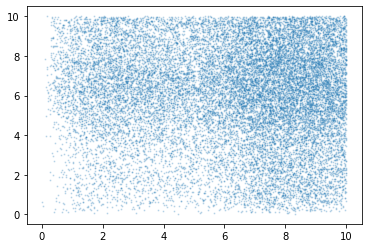

In [19]:
# This is called rejection sampling, a way to brute force sample any surface, so long
# as you're fine waiting for slow code
n = 50000
xs, ys = np.random.uniform(0, 10, n), np.random.uniform(0, 10, n)
zs = (np.sin(xs) + np.cos(ys) + 2 * np.arcsinh(xs * ys))**2
zs /= zs.max()

# Filter the Samples - Rejection Sampling
passed = np.random.uniform(0, 1, n) < zs
xs, ys = xs[passed], ys[passed]
plt.scatter(xs, ys, s=1, alpha=0.2);

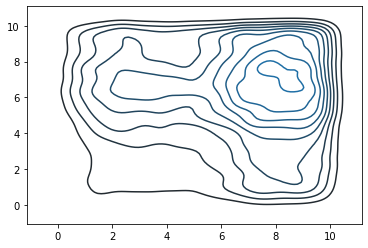

In [20]:
# Plot KDE Plot using Seaborn

sns.kdeplot(xs, ys);

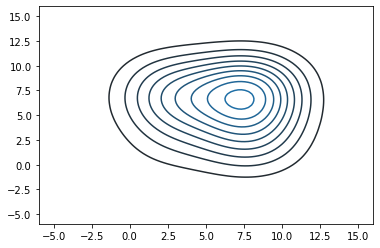

In [21]:
# Smooth - But you may miss the Representation

sb.kdeplot(xs, ys, bw=2.0);

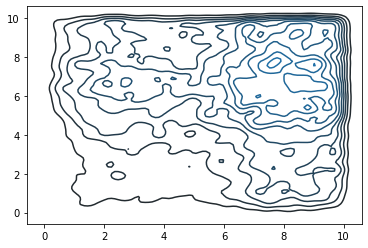

In [22]:
# Unsmooth, and still you may miss the Representation

sb.kdeplot(xs, ys, bw=0.2);

### Jointplots
Joint plots allow you to swap out the interior and marginal plots to get something the perfectly suits your needs

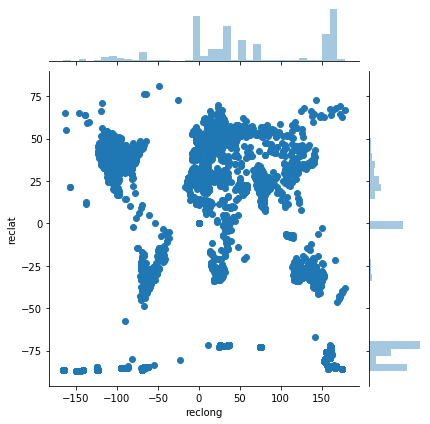

In [23]:
# Plot a Jointplot using Seaborn

sns.jointplot(data=df, x="reclong", y="reclat");

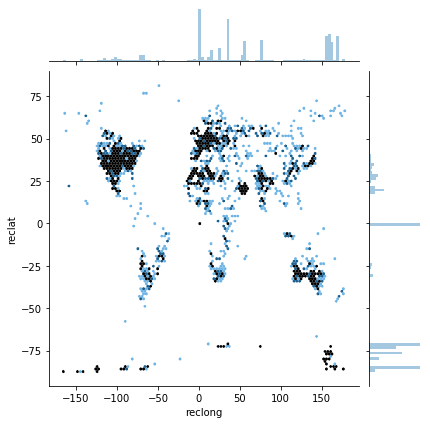

In [24]:
# Plot Joint Plot, and also add bins for the Outside Histogram

sns.jointplot(data=df, x="reclong", y="reclat", kind="hex", 
             gridsize=100, vmax=3, linewidth=0, marginal_kws={"bins": 100});

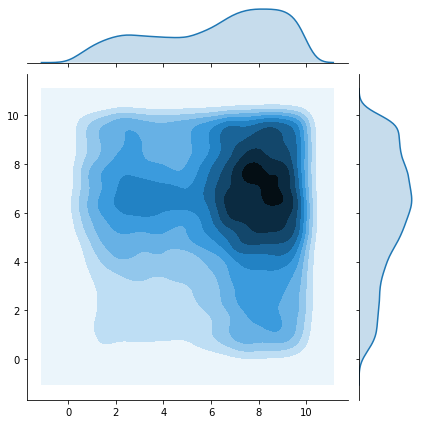

In [26]:
# Perform KDE in Joint Plots

sns.jointplot(x=xs, y=ys, kind="kde");

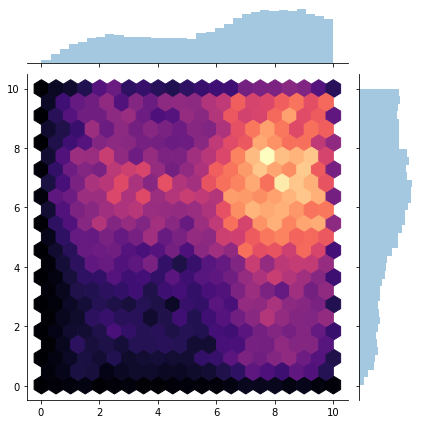

In [27]:
# Create a Joint Plot with Magma Grid

sns.jointplot(x=xs, y=ys, kind="hex", gridsize=20, cmap="magma");

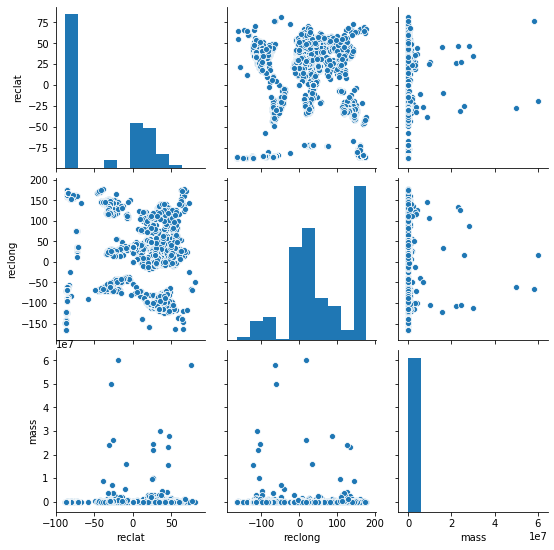

In [28]:
# Get Paitplot for 3 Variables

sns.pairplot(data=df[["reclat", "reclong", "mass"]]);

## 4 - Visualising N - Dimensional Data

In [30]:
# Import Heart Rate CSV

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import manifold

df = pd.read_csv("heart.csv")
target = df["target"].to_numpy()
df = df[["age", "sex", "cp", "trestbps", "chol", "thalach"]]
df.head()

,age,sex,cp,trestbps,chol,thalach
0,63,1,3,145,233,150
1,37,1,2,130,250,187
2,41,0,1,130,204,172
3,56,1,1,120,236,178
4,57,0,0,120,354,163


### Scatter Matrix
It is the easiest and most commonly used way of visualising ND data. It works by breaking the data down to many 2D surfaces.

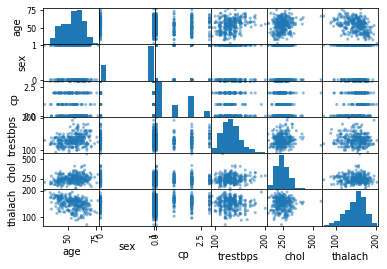

In [31]:
# Scatter Matrix using Pandas on Dataset

pd.plotting.scatter_matrix(df);

### Correlation Matrix

In [32]:
# Correlation Matrix and then Heatmap

df.corr()

,age,sex,cp,trestbps,chol,thalach
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,-0.398522
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,-0.044020
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.295762
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,-0.046698
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,-0.009940
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,1.000000


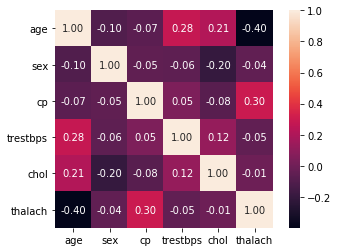

In [34]:
# Plot heatmap using Seaborn

ax = sns.heatmap(df.corr(), annot=True, fmt="0.2f", square=True);

### Complicated Method - Spiral

In [35]:
# Creating a Self Data Just to Visualise a 4 Dimensional Data

np.random.seed(0)
n = 2000
t = np.linspace(0, 20, n)

# Create X and Y with relation to t(time)
x = t * np.sin(t) + 0.2 * np.random.normal(size=n)
y = t * np.cos(t) + 0.2 * np.random.normal(size=n)

# Create Z as obtained from X and y
z = np.log(t + 1) * np.sin(np.sqrt(t)) + 0.1 * np.random.normal(size=n)
a = np.log(t + 1) * np.cos(np.sqrt(t)) + 0.1 * np.random.normal(size=n)

# Append the Results to Dataframe
df2 = pd.DataFrame({"x": x, "y": y, "z": z, "a": a})
data = df2.to_numpy()

In [38]:
df2

,x,y,z,a
0,0.352810,-0.306584,0.061335,0.204254
1,0.080132,-0.332390,0.185364,-0.082041
2,0.196148,0.029233,0.029902,0.031082
3,0.449079,-0.161673,0.118743,0.015388
4,0.375113,0.023826,-0.166035,0.175010
...,...,...,...,...
1995,17.901440,8.767075,-3.085034,-0.801534
1996,18.259029,9.048770,-2.917980,-0.816915
1997,18.105532,8.510700,-3.008312,-0.751099
1998,17.938862,8.655154,-2.916458,-0.753420


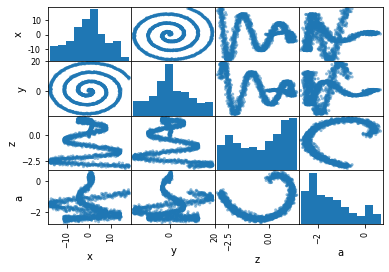

In [36]:
# Plot a Scatter Matrix

pd.plotting.scatter_matrix(df2);

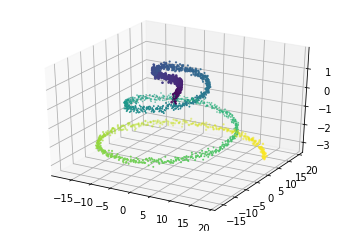

In [39]:
# Add a 3D Cubic Projection on the Dataset

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, c=t, s=3+a) # s - Size

The above an interesting pattern, and we can see some clear relationships on some of the slices, but not all of them.
( We Know the x, y, z are in relation with time t. We need to identify it

### Manifold Learning

There are lots of techniques we could use, but I think manifold learning is the best. See https://scikit-learn.org/stable/modules/manifold.html for all of the easy to use `sklearn` implementations. Note that the next section closely follows the sklearn example, so I'd recommend having a look at that link to know more

There are other ways of compressing dimensionality, and Manifold Learning comes under "Dimensionality Reduction"

Running LLE
Running LTSA
Running Hessian LLE
Running Modified LLE
Running Isomap
Running MDS
Running SE
Running t-SNE


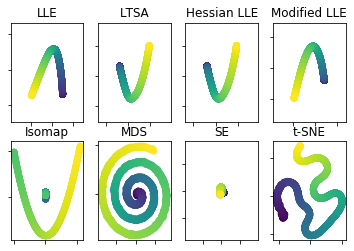

In [42]:
# Pre Defined Methods of Manifold

methods = [
    ("LLE", manifold.LocallyLinearEmbedding(n_neighbors=20, method='standard')),
    ("LTSA", manifold.LocallyLinearEmbedding(n_neighbors=20, method='ltsa')),
    ("Hessian LLE", manifold.LocallyLinearEmbedding(n_neighbors=20, method='hessian')),
    ("Modified LLE", manifold.LocallyLinearEmbedding(n_neighbors=20, method='modified')),
    ("Isomap", manifold.Isomap()),
    ("MDS", manifold.MDS(n_init=1)),
    ("SE", manifold.SpectralEmbedding()),
    ("t-SNE", manifold.TSNE()),
]

# For 8 Methods, Split as 2 rows and 4 columns
fig, axes = plt.subplots(nrows=2, ncols=4)

# Loop through them
for (name, method), ax in zip(methods, axes.flatten()):
    print(f"Running {name}")
    Y = method.fit_transform(data)
    ax.scatter(Y[:, 0], Y[:, 1], c=t)
    ax.set_title(name)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

##### We can See that Manifold Learning has identified the relation between them, as the color indicates time and the relationship is visible

Running LLE
Running LTSA
Method LTSA failed
Running Hessian LLE
Method Hessian LLE failed
Running Modified LLE


D:\Anaconda\envs\py36\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:937: LinAlgWarning: Diagonal number 86 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)


Running Isomap
Running MDS
Running SE
Running t-SNE


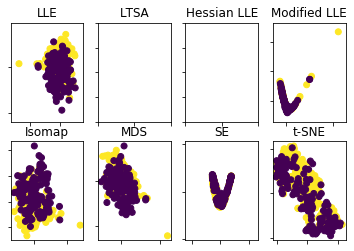

In [43]:
# Apply Manifold Learning on Heart Rate Data

fig, axes = plt.subplots(nrows=2, ncols=4)
for (name, method), ax in zip(methods, axes.flatten()):
    print(f"Running {name}")
    try:
        # Reading our Dataset
        Y = method.fit_transform(df.to_numpy())
        ax.scatter(Y[:, 0], Y[:, 1], c=target)
    except Exception:
        # As some Methods may fail
        print(f"Method {name} failed")
    ax.set_title(name)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

We can See that there is no visible/clear pattern emerging from the Data, So we need to perform/try more techniques